<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Отлично, Георгий! Ты здорово поработал над комментариями и теперь твой проект принят.
    
Спасибо за работу и успехов в следующих проектах!)

<div style="border:solid green 2px; padding: 20px">
<b>Георгий, привет!</b>

Меня зовут Михаленко Дмитрий, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

# Анализ бизнес-показателей приложения Procrastinate Pro+

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо отформатировал саму цель проекта и указал, какие данные у нас есть для анализа</div>

### Описание данных

В вашем распоряжении три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

#### Структура `visits_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

#### Структура `orders_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

#### Структура `costs_info_short.csv`:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

### Загрузите данные и подготовьте их к анализу

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`.
- заказы: `/datasets/orders_info_short.csv`.
- расходы: `/datasets/costs_info_short.csv`.


In [1]:
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np
from scipy import stats as st
from datetime import datetime, timedelta
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv'))


except:
    visits, orders, costs = (
        pd.read_csv('visits_info_short.csv'),
        pd.read_csv('orders_info_short.csv'),
        pd.read_csv('costs_info_short.csv'))

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Данные загружены, но все же чуть лучше было бы использовать формат чтения данных try - except, тогда пользователь проекта сможет указать свой путь к датасетам, ничего не сломав)
    
А вот тут например есть способы написания try - except и код:
    
* https://python.land/deep-dives/python-try-except

In [3]:
# обзор датафрейма visits
visits.info()
visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [4]:
# обзор датафрейма orders

orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [5]:
# обзор датафрейма costs

costs.info()
costs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.00
1796,2019-10-24,lambdaMediaAds,6.40
1797,2019-10-25,lambdaMediaAds,8.80
1798,2019-10-26,lambdaMediaAds,8.80


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> При помощи info проверили самую основную информацию из полученных файлов для анализа</div>

In [6]:
# проверяем таблицы на наличие дубликатов

display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И наличие явных дубликатов тоже проверено</div>

Пропусков и явных дубликатов нет, но нужно будет привести наименования столбцов к единому стилю и сгуппировать данные для наглядности. А также привести данные о времени к нужному типу.

### Предобработка данных

In [7]:
# приведем наименования столбцов к хорошему стилю

visits.columns = visits.columns.str.lower()
visits.columns = [name.lower().replace(' ', '_') for name in visits.columns]
orders.columns = [name.lower().replace(' ', '_') for name in orders.columns]
costs.columns = costs.columns.str.lower()

display(visits.columns)
display(orders.columns)
display(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Про snake_case тоже не забываем</div>

In [8]:
# преобразование данных о времени

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Правильно замечено, тип object датам тут ни к чему</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Ты провел большую работу с данными: загрузил их и провел первичный осмотр, привел столбцы к нужному формату snake_case, проанализировал наличие пропусков и дубликатов в датасете, привел время к подходящему типу данных.</div>

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Получим функции из теории спринта</div>

#### Основные функции


In [9]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [10]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


In [11]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [12]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
  
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )


#### Графики

In [13]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [14]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [15]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [		
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


In [16]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Необходимые функции загружены </div>

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили

In [17]:
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.00
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.00
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.01
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.13
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.25


In [18]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
analysis_horizon = 14  # горизонт анализа

# считаем минимальную привлечения
min_analysis_date = profiles['dt'].min()

# считаем максимальную дату привлечения
max_analysis_date = observation_date - timedelta(days=analysis_horizon - 1) 

print(f'Минимальная дата привлечения пользователей: {min_analysis_date}')
print(f'Максимальная дата привлечения пользователей: {max_analysis_date}')

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-19


<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Тут для наглядности еще можно воспользоваться f строкой и вывести эти даты чуть лучше с точки зрения форматирования
    
Вот тут можешь посмотреть, как ими можно пользоваться:
    
* https://python-scripts.com/f-strings?ysclid=lg6j2vougc6888344

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> На самом деле по условиям ТЗ не просили рассчитывать максимальную дату именно с учетом горизонта, он появляется в работе позже)

Установим момент и горизонт анализа данных.

#### Страны

Разберем, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

In [19]:
region =  (profiles.pivot_table(index='region', columns='payer', values='user_id', aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False))
region['payer_share'] = (region.payer / (region.not_payer + region.payer) * 100).round(2)
region

payer,not_payer,payer,payer_share
region,,,
United States,93100,6902,6.90
UK,16875,700,3.98
France,16787,663,3.80
Germany,14365,616,4.11


<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Здесь хоть при каждом новом расчете нам не нужно будет вносить существенные изменения, но такую таблицу вполне можно завернуть в функцию, где мы по сути будем только менять region, device и channel это повысит автоматизацию кода

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Кстати, если захочешь повысить свои навыки в целом в написании кода могу посоветовать сайт

* https://www.codewars.com/kata/latest/python

Там, ты шаг за шагом сможешь улучшать свой скилл в python</div>

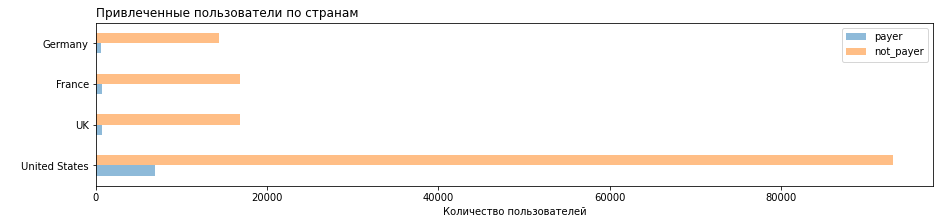

In [20]:
fig, ax = plt.subplots(figsize=(15, 3))
region[['payer', 'not_payer']].plot(kind='barh', ax=ax, alpha=0.5)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Привлеченные пользователи по странам',loc='left')
plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Вижу, что ты добавляешь к каждому шагу графики для наглядности, молодец! Менеджеру порой бывает сложно ориентироваться в числах и график ему хорошо поможет. Спринт по визуализации данных еще предстоит в твоем обучении, но могу посоветовать тебе такой сайт, там ты сможешь найти много нового о визуализации, это к тому же еще и хорошая шпаргалка для следующих проектов:
    
* https://www.python-graph-gallery.com

Мы видим, что подавляющее большинство привлеченных пользователей - из США. Эта же страна лидирует и по количеству платящих пользователей. Франция и Великобритания очень похожи по показателям, а в отстающих - Германия (но при этом по доле платящих пользователей она на втором месте).

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Правильно, причем даже если суммарно сложить всех пользователей (в том числе и платящих) прочих стран мы едва получим половину от всех пользователей Штатов</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Только отмечу, что тут и в двух следующих пунктах задания нужно было еще рассчитать долю платящих у каждого сегмента, сейчас к сожалению доли не определены

#### Устройства

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [21]:
device = (profiles.pivot_table(index='device', columns='payer', values='user_id', aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False))
device['payer_share'] = (device.payer / (device.not_payer + device.payer) * 100).round(2)
device

payer,not_payer,payer,payer_share
device,,,
iPhone,51097,3382,6.21
Android,32982,2050,5.85
Mac,28130,1912,6.36
PC,28918,1537,5.05


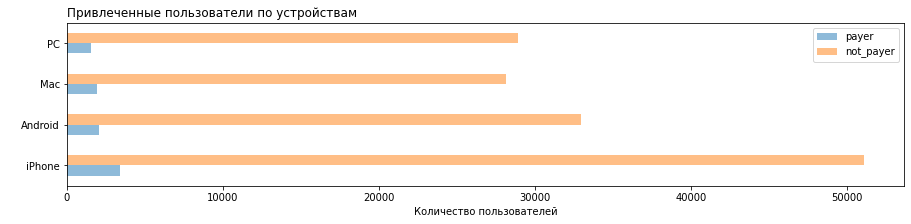

In [22]:
fig, ax = plt.subplots(figsize=(15, 3))
device[['payer', 'not_payer']].plot(kind='barh', ax=ax, alpha=0.5)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Привлеченные пользователи по устройствам',loc='left')
plt.show()

Клиенты (как платящие, так и не платящие) предпочитают iPhone.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Все верно, и тут заметно, что совокупно с отрывом лидируют устройства кампании Apple, исходя из этого хорошо было бы посмотреть, а может это как-то связано со странами? Логично было бы предположить, что пользуются "яблочными" устройствами в Америке, но так-ли это? 😊 </div>

#### Каналы привлечения

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.

In [23]:
channel =  (profiles.pivot_table(index='channel', columns='payer', values='user_id', aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False))
channel['payer_share'] = (channel.payer / (channel.not_payer + channel.payer) * 100).round(2)
channel

payer,not_payer,payer,payer_share
channel,,,
FaceBoom,25587,3557,12.20
TipTop,17683,1878,9.60
organic,55279,1160,2.06
WahooNetBanner,8100,453,5.30
AdNonSense,3440,440,11.34
RocketSuperAds,4096,352,7.91
LeapBob,8291,262,3.06
OppleCreativeMedia,8372,233,2.71
lambdaMediaAds,1924,225,10.47


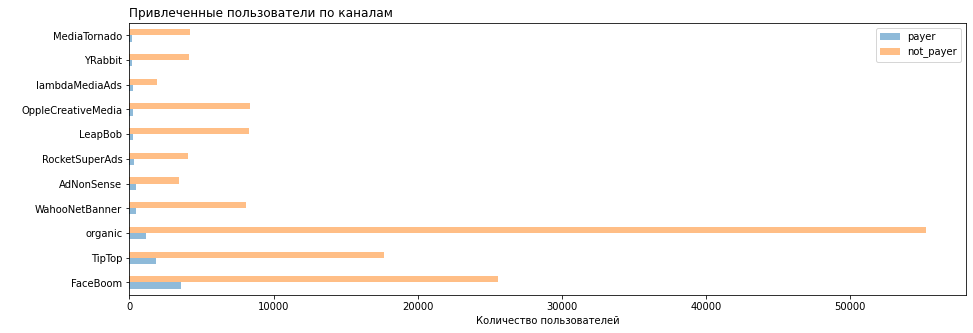

In [24]:
fig, ax = plt.subplots(figsize=(15, 5))
channel[['payer', 'not_payer']].plot(kind='barh', ax=ax, alpha=0.5)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Привлеченные пользователи по каналам',loc='left')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Тут, как ты уже обратил внимание ниже, большую долю всех пользователей занимает органика, можешь поделиться своими мыслями как продуктовый аналитик, похожа-ли такая картина на правду, чем это может быть хорошо/плохо для нашего продукта? </div>

Больше всего пользуются приложением органические пользователи, правда их доля конверсии очень низкая. Два самых больших канала - TipTop и FaceBoom показывают неплохие результаты. Так же, хороших поток привлеченных платящих пользователей показывает AdNonSense.

- Мы посмотрели на базовые значения конверсии пользователей в покупатели по регионам, устройствам и каналу привлечения;
- Определили основной рынок: больше всего приходит пользователей из США, и они лучше других конвертируется;
- При этом большая часть пользователей заходит с мобильных устройств;
- Также, мы можем сказать, что наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, т.е. мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию в покупателей.

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> По общим промежуточным выводам в целом все верно, но напомню, что про конверсию пока что мы сказать ничего не можем, поскольку выше она не была рассчитана

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Молодец! В каждом разделе добавлен расчет, все как надо

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [25]:
print(f'Общая сумма затрат на рекламу: {costs.costs.sum().round()}')

Общая сумма затрат на рекламу: 105497.0


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Определили общую сумму трат </div>

In [66]:
costs.pivot_table(index='channel',values='costs',aggfunc='sum').sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48



<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Для наглядности еще можно отобразить проценты от общих трат)

Проанализирвовав таблицу `costs`, мы выяснили, что приложение больше всего вкладывает в рекламу на TipTop И FaceBoom.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Но в целом верно, на эти два канала мы тратим существенно больше</div>

In [27]:
costs['month'] = costs['dt'].astype('datetime64[M]') 
costs['week'] = costs['dt'].astype('datetime64[W]') 

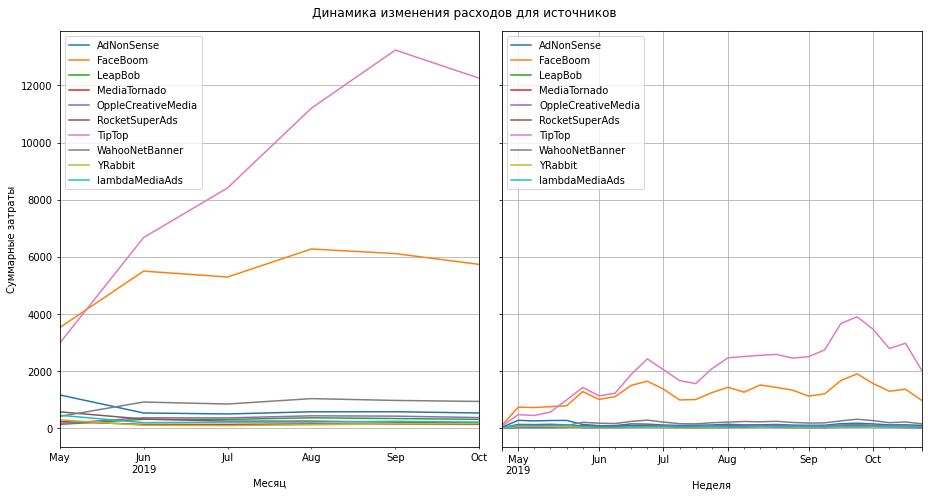

In [68]:
fig, ax = plt.subplots(figsize=(13, 7))
fig.suptitle('Динамика изменения расходов для источников')
ax1 = plt.subplot(1,2,1)
costs_pivot = costs.pivot_table(index='month', columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=True, ax = ax1)
plt.legend(loc=2, prop={'size': 10})
plt.xlabel('Месяц')
plt.ylabel('Суммарные затраты')
ax2 = plt.subplot(1,2,2, sharey = ax1)
costs_pivot = costs.pivot_table(index='week', columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=True, ax = ax2)
plt.legend(loc=2, prop={'size': 10})
plt.xlabel('Неделя')
plt.tight_layout()

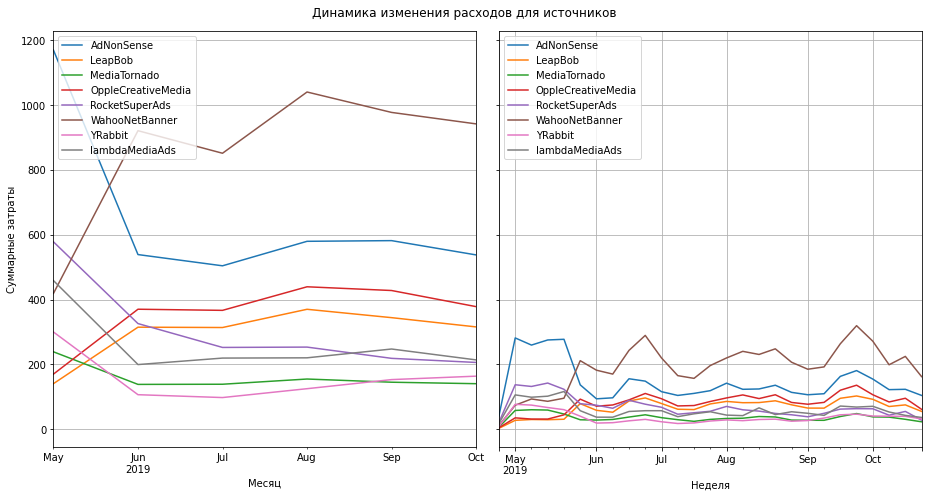

In [70]:
#То же самое, но без топ-2
fig, ax = plt.subplots(figsize=(13, 7))
fig.suptitle('Динамика изменения расходов для источников')
ax1 = plt.subplot(1,2,1)
costs_pivot = costs.query('channel != ["TipTop", "FaceBoom"]').pivot_table(index='month', columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=True, ax = ax1)
plt.legend(loc=2, prop={'size': 10})
plt.xlabel('Месяц')
plt.ylabel('Суммарные затраты')
ax2 = plt.subplot(1,2,2, sharey = ax1)
costs_pivot = costs.query('channel != ["TipTop", "FaceBoom"]').pivot_table(index='week', columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=True, ax = ax2)
plt.legend(loc=2, prop={'size': 10})
plt.xlabel('Неделя')
plt.tight_layout()

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Здорово построил графики трат по каналам как по месяцам, так и по каналам </div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Тут обрати внимание на довольно необычный кейс, он объяснен довольно подробно вот тут:
    
* https://translated.turbopages.org/proxy_u/en-ru.ru.d71c6ba1-642f0fb1-2196a985-74722d776562/https/stackoverflow.com/questions/16074392/getting-vertical-gridlines-to-appear-in-line-plot-in-matplotlib

    
На правом графике совсем не отображаются вертикальные линии, хотя казалось бы что должны.
    
*******
    

Можно полечить проблему таким кодом:


    ax1.grid(b=True, which='minor', axis='both', linestyle='-')

    ax1.grid(b=True, which='major', axis='both', linestyle='-')

*******

Если коротко, то просто python распознает месяца как параметры времени, и ставит отметки только в самом начале и конце, которые не являются видимыми</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Как дополнение тут еще можно посмотреть на точно те же графики, но без ТипТоп и Фейсбум, может быть мы не видим каких-то особенностей по остальным каналам из-за масштаба

Рассчитаем средний CAC на одного пользователя для всего проекта, используя профили пользователей, но без канала Organic, т.к. этот канал привлечения приложению ничего не стоит.

In [29]:
cac_person = (profiles.query('channel != "organic"')[['user_id', 'acquisition_cost']]
              .drop_duplicates()
              .agg({'acquisition_cost': 'mean'}))
cac_person

acquisition_cost   1.13
dtype: float64

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Молодец, что тут добавил средний САС всей кампании</div>

И для каждого источника трафика.

In [30]:
cac_channel = (profiles.pivot_table(index = 'channel', values = 'acquisition_cost', aggfunc='mean')
       .sort_values(by='acquisition_cost', ascending=False)
       .rename(columns={'acquisition_cost': 'cac'}))
cac_channel

,cac
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Как вы видим, дороже всего приложению обходится пользователь, которого привлекли просредством TipTop.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Всё правильно и самый дорогой канал в абсолютном отношении у нас стал самым дорогим в стоимости привлечения пользователей</div>

В общей сложности:
- Общая сумма расходов на маркетинг составила 105497 ед. 
- Наибольше расходы составили на канал TipTop - 54751.30 ед. и FaceBoom - 32445.60 ед. Расходы на остальные каналы существенно ниже, например, на третьем месте - WahooNetBanner с 5151 ед. Последние места занимают канал YRabbit (944.22 ед.) и MediaTornado (954.48 ед.). 
- Каждый месяц с мая по сентябрь расходы на маркетинг росли все больше и больше. График изменения расходов по времени показал, что траты на TipTop возрастали с каждым месяцем. Траты на FaceBoom росли гораздо медленнее. Все остальные источники существенно уступают по объему расходов на маркетинг.
- Средний CAC по всему проекту составил 1.13 ед, в то время как самый затратный пользователь пришелся на компанию TipTop.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И по пунктам описали полученные выводы, заметнее всего тут конечно выделяются каналы TipTop и Faceboom, на которые были потрачены почти все средства кампании</div>

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [31]:
profiles = profiles.query('channel != "organic"')

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Органика нам дальше не нужна</div>

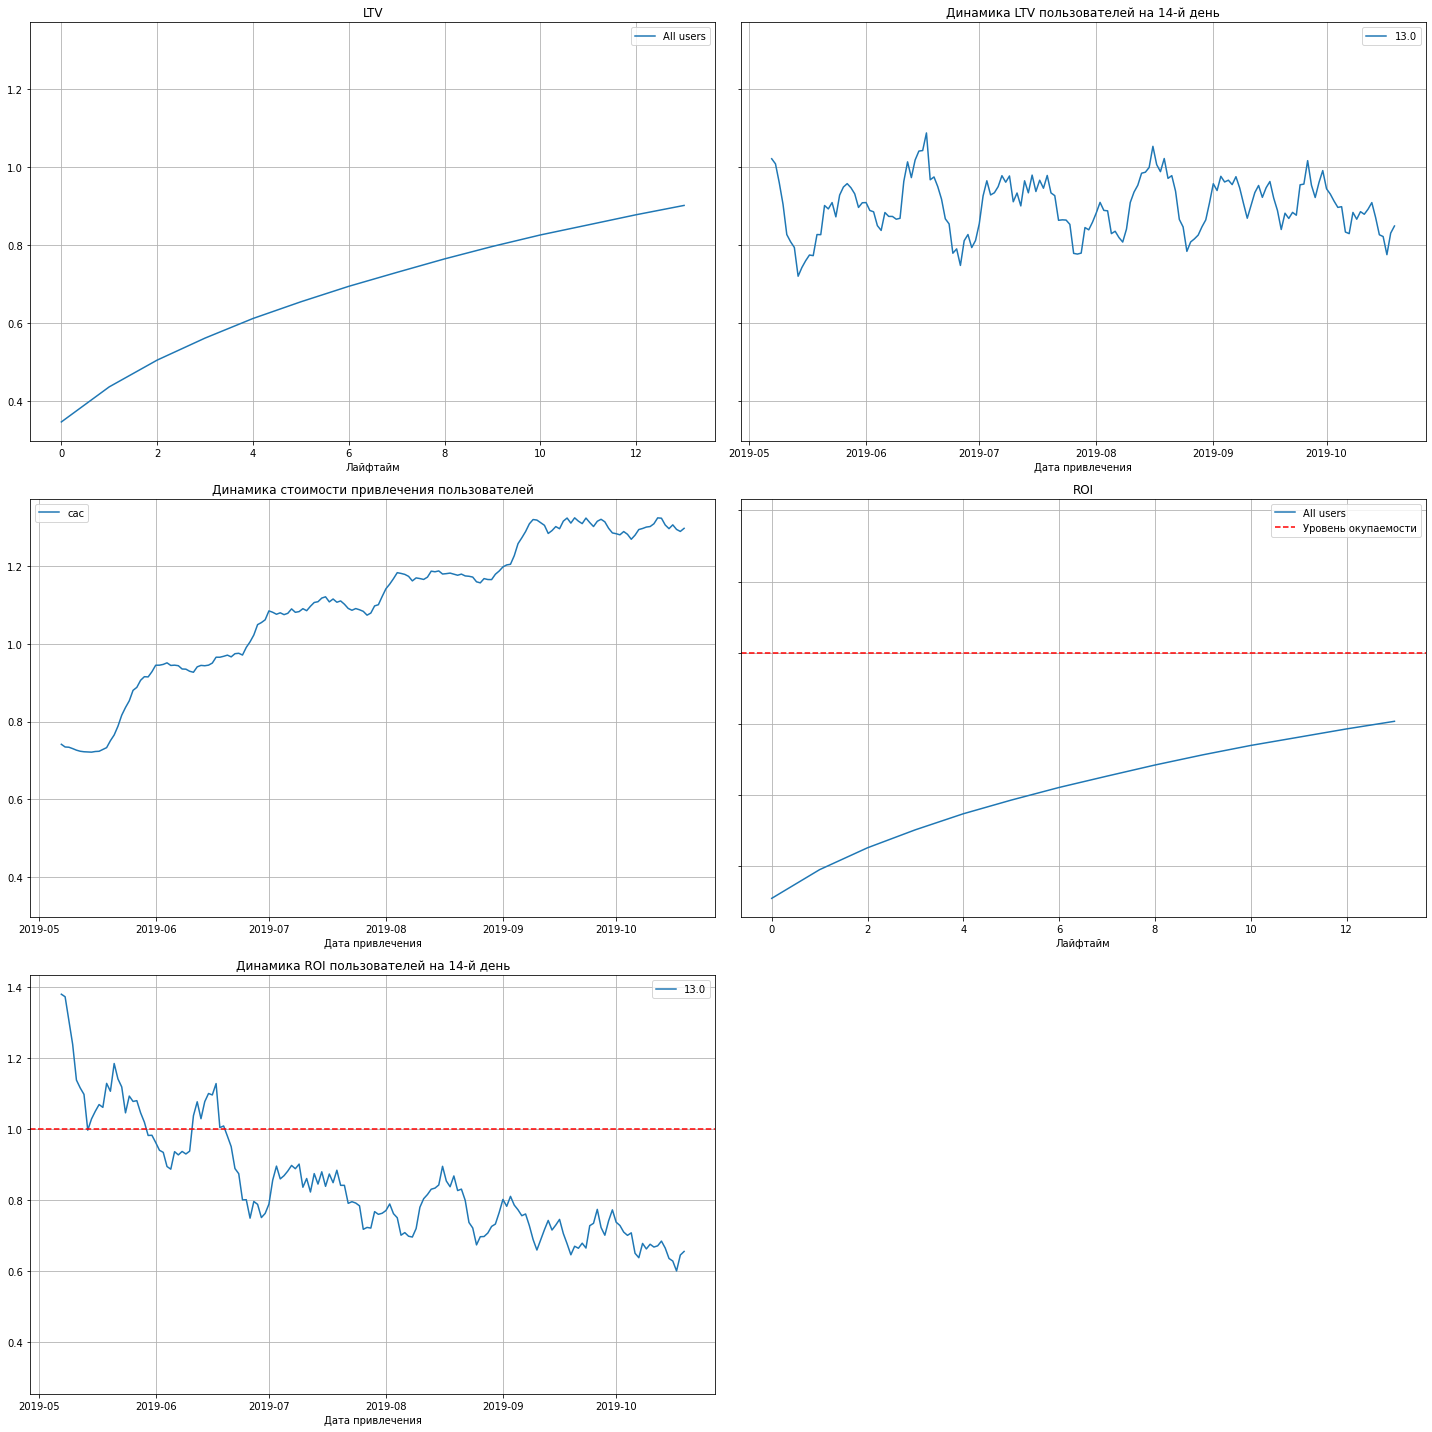

In [32]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

Какие выводы можно сделать по этим графикам:

- реклама к 14-му дню и далее не окупается;
- САС растет, значит рекламный бюджет увеличивается;
- начиная с июня что-то идет не так: привлеченные клиенты перестают окупаться в двух-недельном лайфтайме.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Основные пункты здорово отмечены, САС растет, до положительного ROI кампания не доходит, динамика ROI ухудшается с июня</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Но графики LTV тут тоже стоит описать

#### Конверсия и удержание


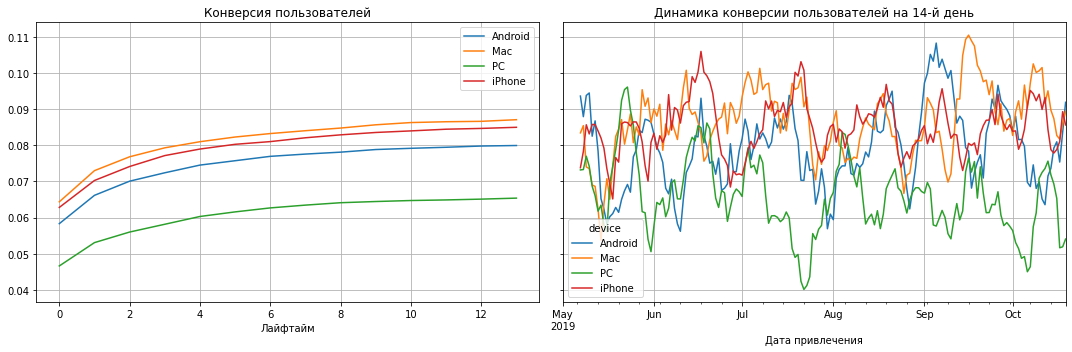

In [33]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Молодец, что анализируешь конверсию и удержание в разрезе отдельных сегментов</div>

Все устройства хорошо конверсируются, в лидерах устройства производста компании Apple, из общего потока немного выбиваются привлеченные пользователи, использующие PC: они привлекаются не так удачно.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Верно, Apple конвертируется лучше всего</div>

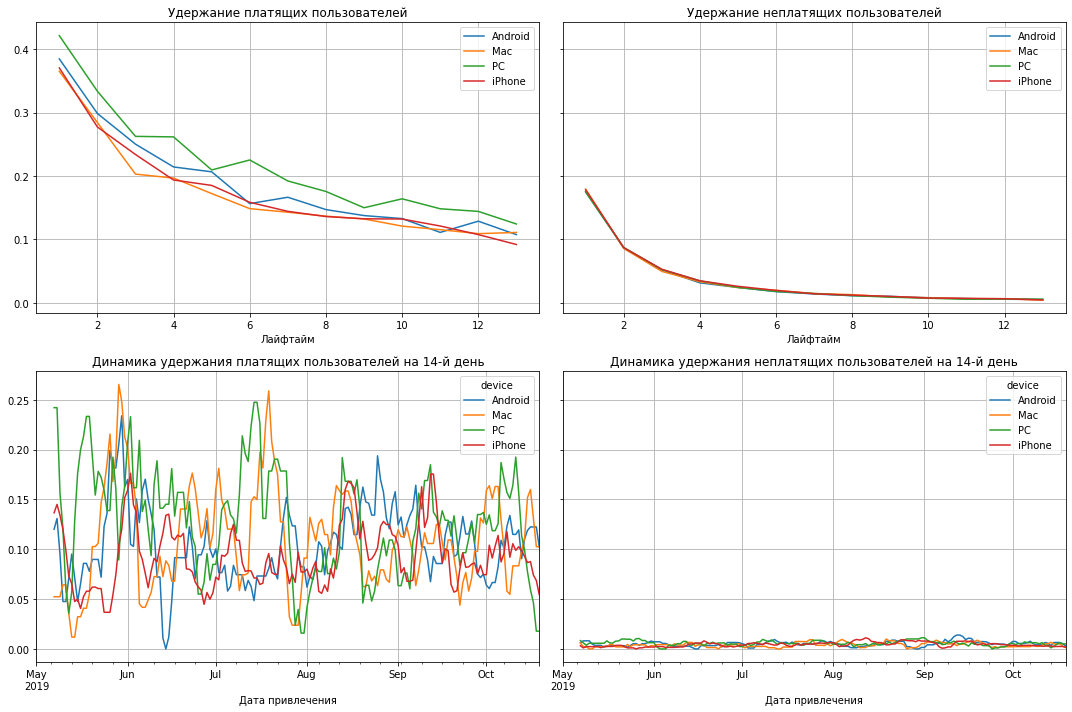

In [34]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Удержания пользователей в зависимости от устройств не очень сильно отличаются друг от друга, платящие пользователи PC удерживаются чуть лучше.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> По удержанию в устройствах нет существенных выбросов, но при этом PC удерживается чуть лучше</div>

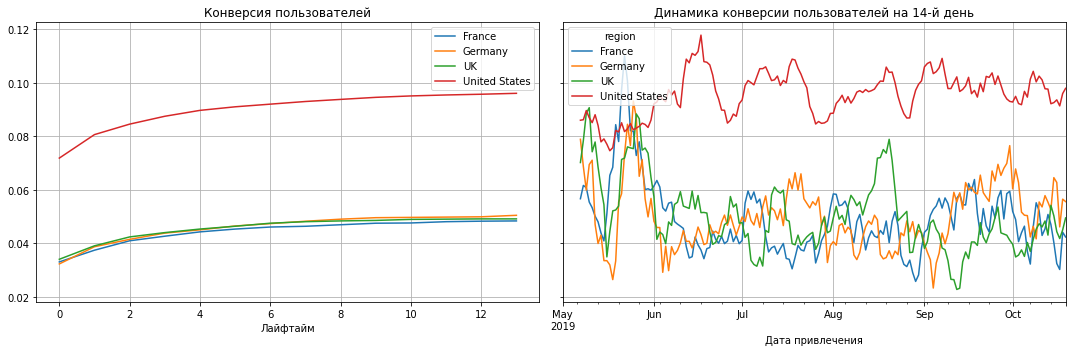

In [35]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Конверсия пользователей США почти в два раза выше конверсии пользователей других стран.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да,  и это же будет заметно в разделе расчета доли платящих (если добавить саму долю)</div>

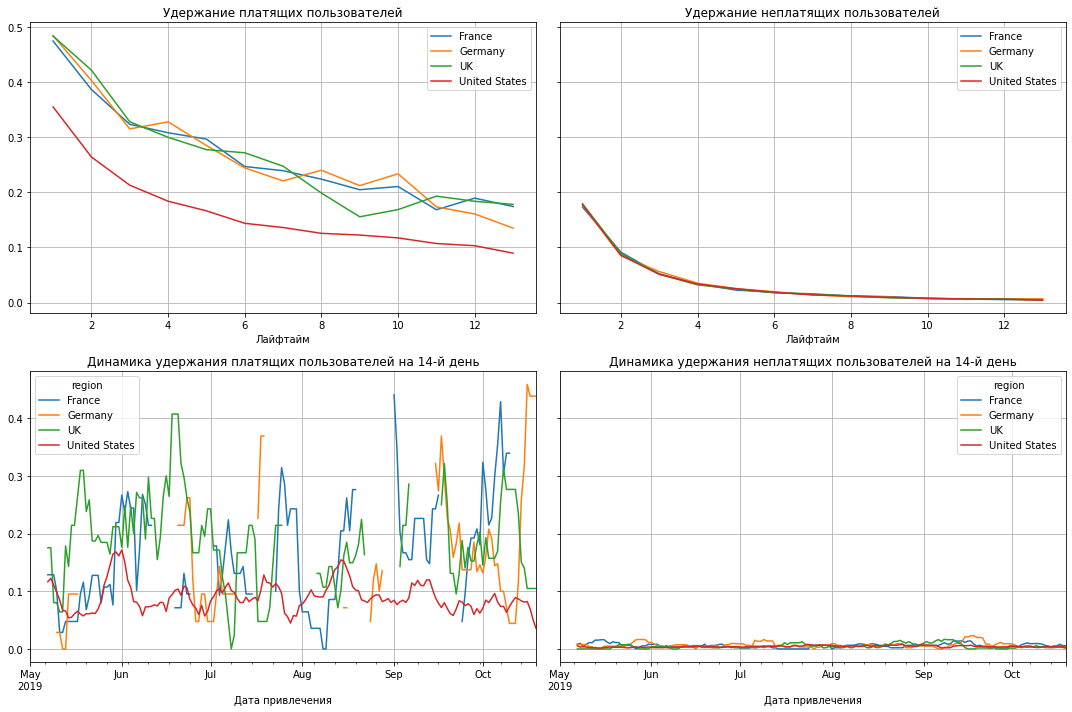

In [36]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

А вот с удержанием платящих пользователей США хуже всех.
Неплатящие пользователи не показываю каких-то отличий (ни тип устройства, ни регион на их удержание не влияют).

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> А с удержанием по Штатам возникают проблемы, заметные невооруженным взглядом</div>

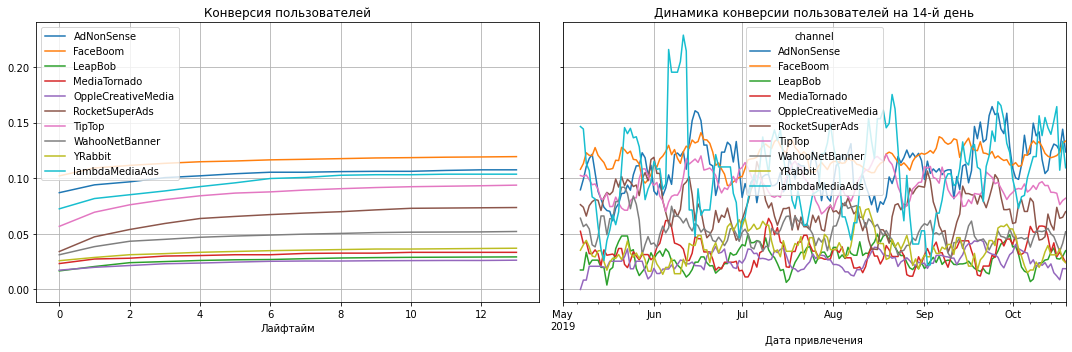

In [37]:
# смотрим конверсию с разбивкой по каналам привлечения
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Выше всего конверсия у пользователей, привлеченных посредством FaceBoom. Но вообще, динамики у всех пользователей в течение двухнедельного лайфтайма практически и нет.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо, и кстати Faceboom это один из самых дорогих каналов в кампании</div>

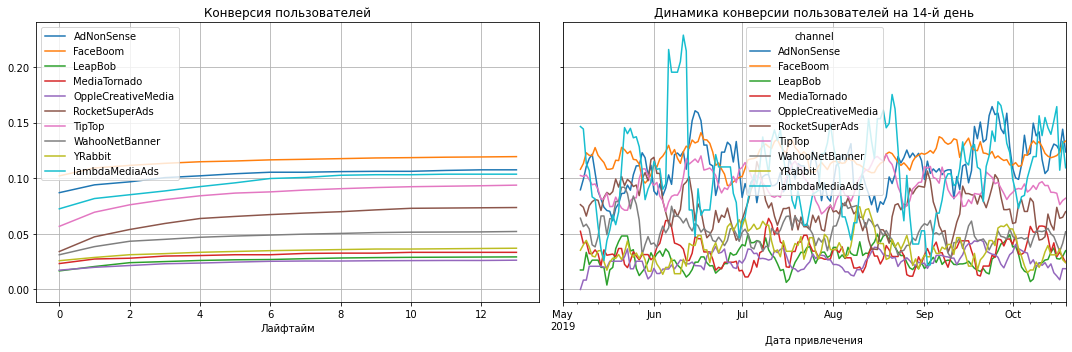

In [38]:
# смотрим конверсию с разбивкой по каналам привлечения
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Хуже всего из платящих удерживаются пользователи из FaceBoom и AdNonSense.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И лидеры конверсии снова плохо удерживаются</div>

### Окупаемость рекламы

 #### Окупаемость рекламы с разбивкой по устройствам

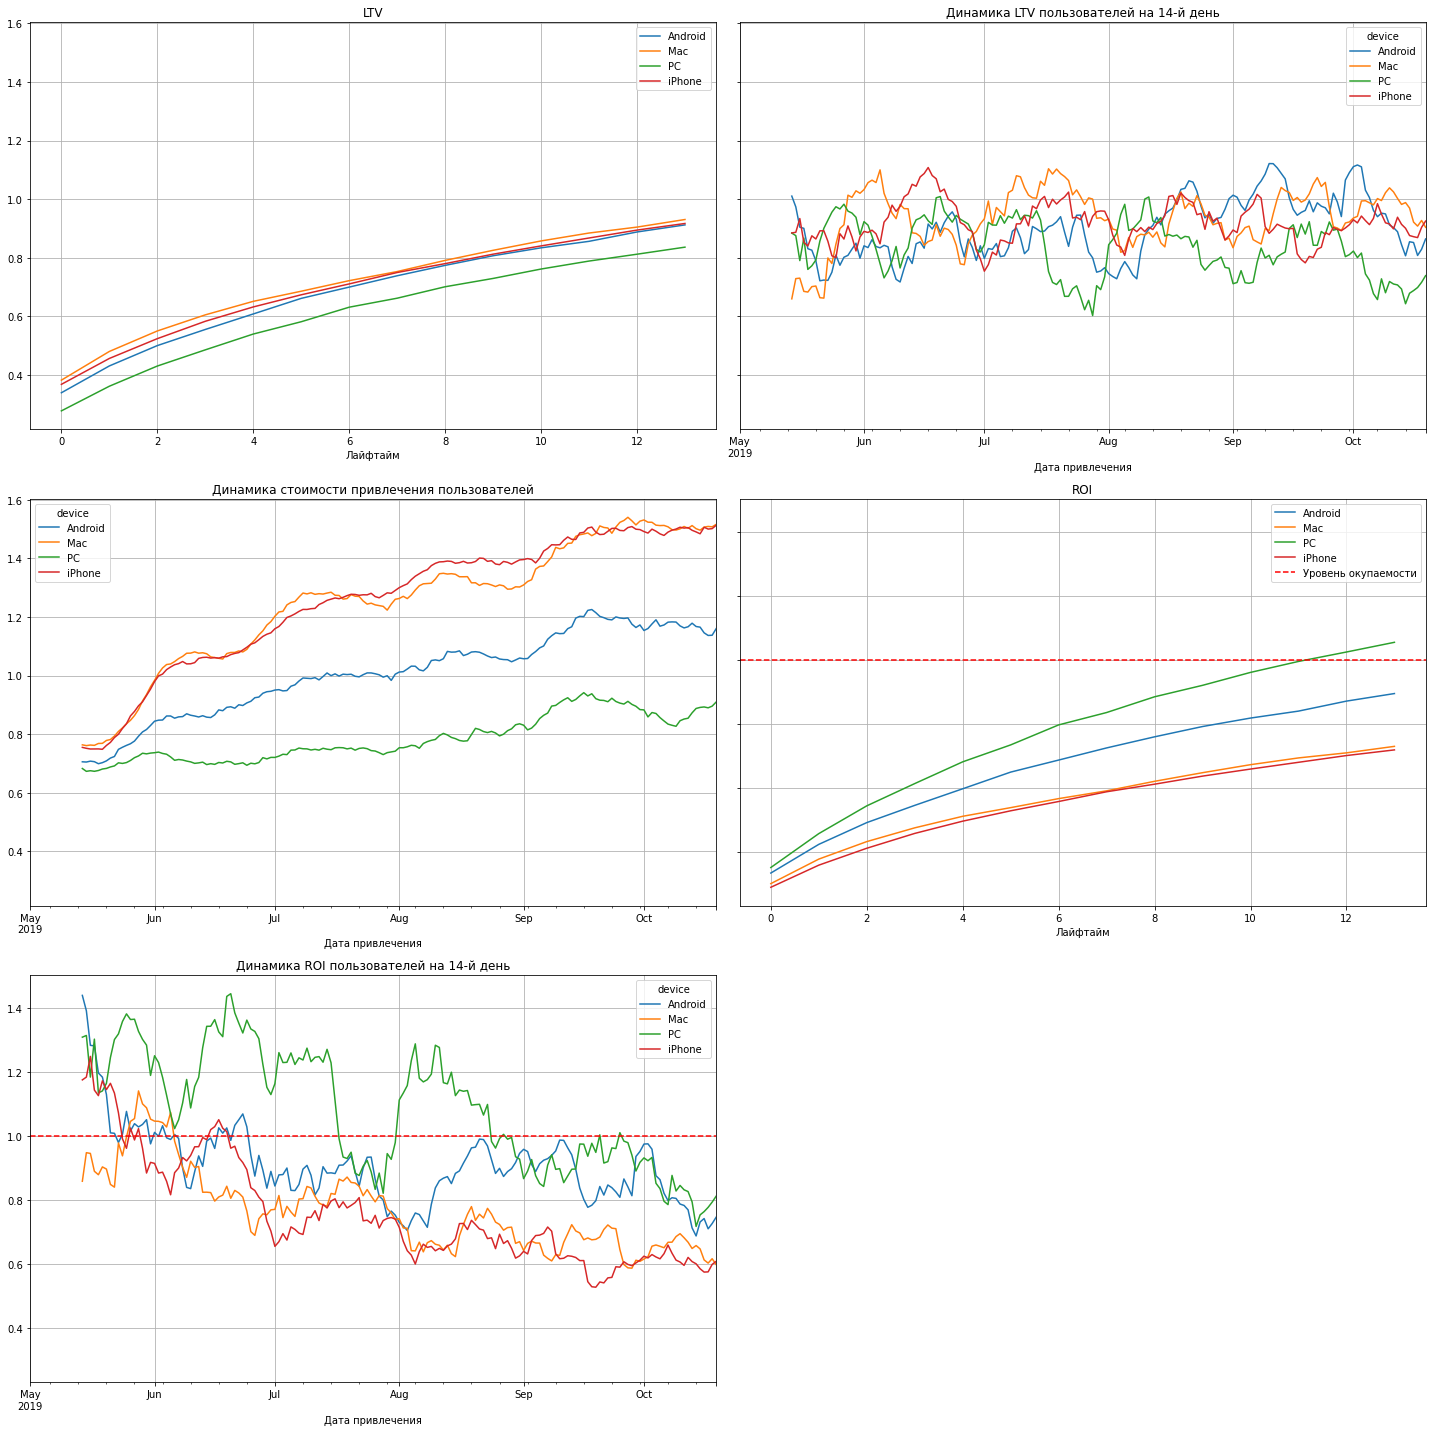

In [39]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

Здесь мы видим вполне стабильное качество привлечение пользователей со всех платформ, но при этом стоимость привлечения сильно варьируется. Самые дешевые клиенты - юзеры ПК, самые дорогие - пользователи iOS.

Реклама окупалась только для ПК пользователей, и то с трудом (только к концу лайфтайма). Причём ПК пользователи - это самый медленный поток клиентов (зато более надежный) 

Все остальные затраты - совсем впустую.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Успешной с точки зрения окупаемости можно назвать лишь PC, но и это устройство окупилось лишь в конце</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Но тут кроме графика окупаемости опиши пожалуйста и другие графики тоже

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Отлично, дополнили описание

 #### Окупаемость рекламы с разбивкой по странам

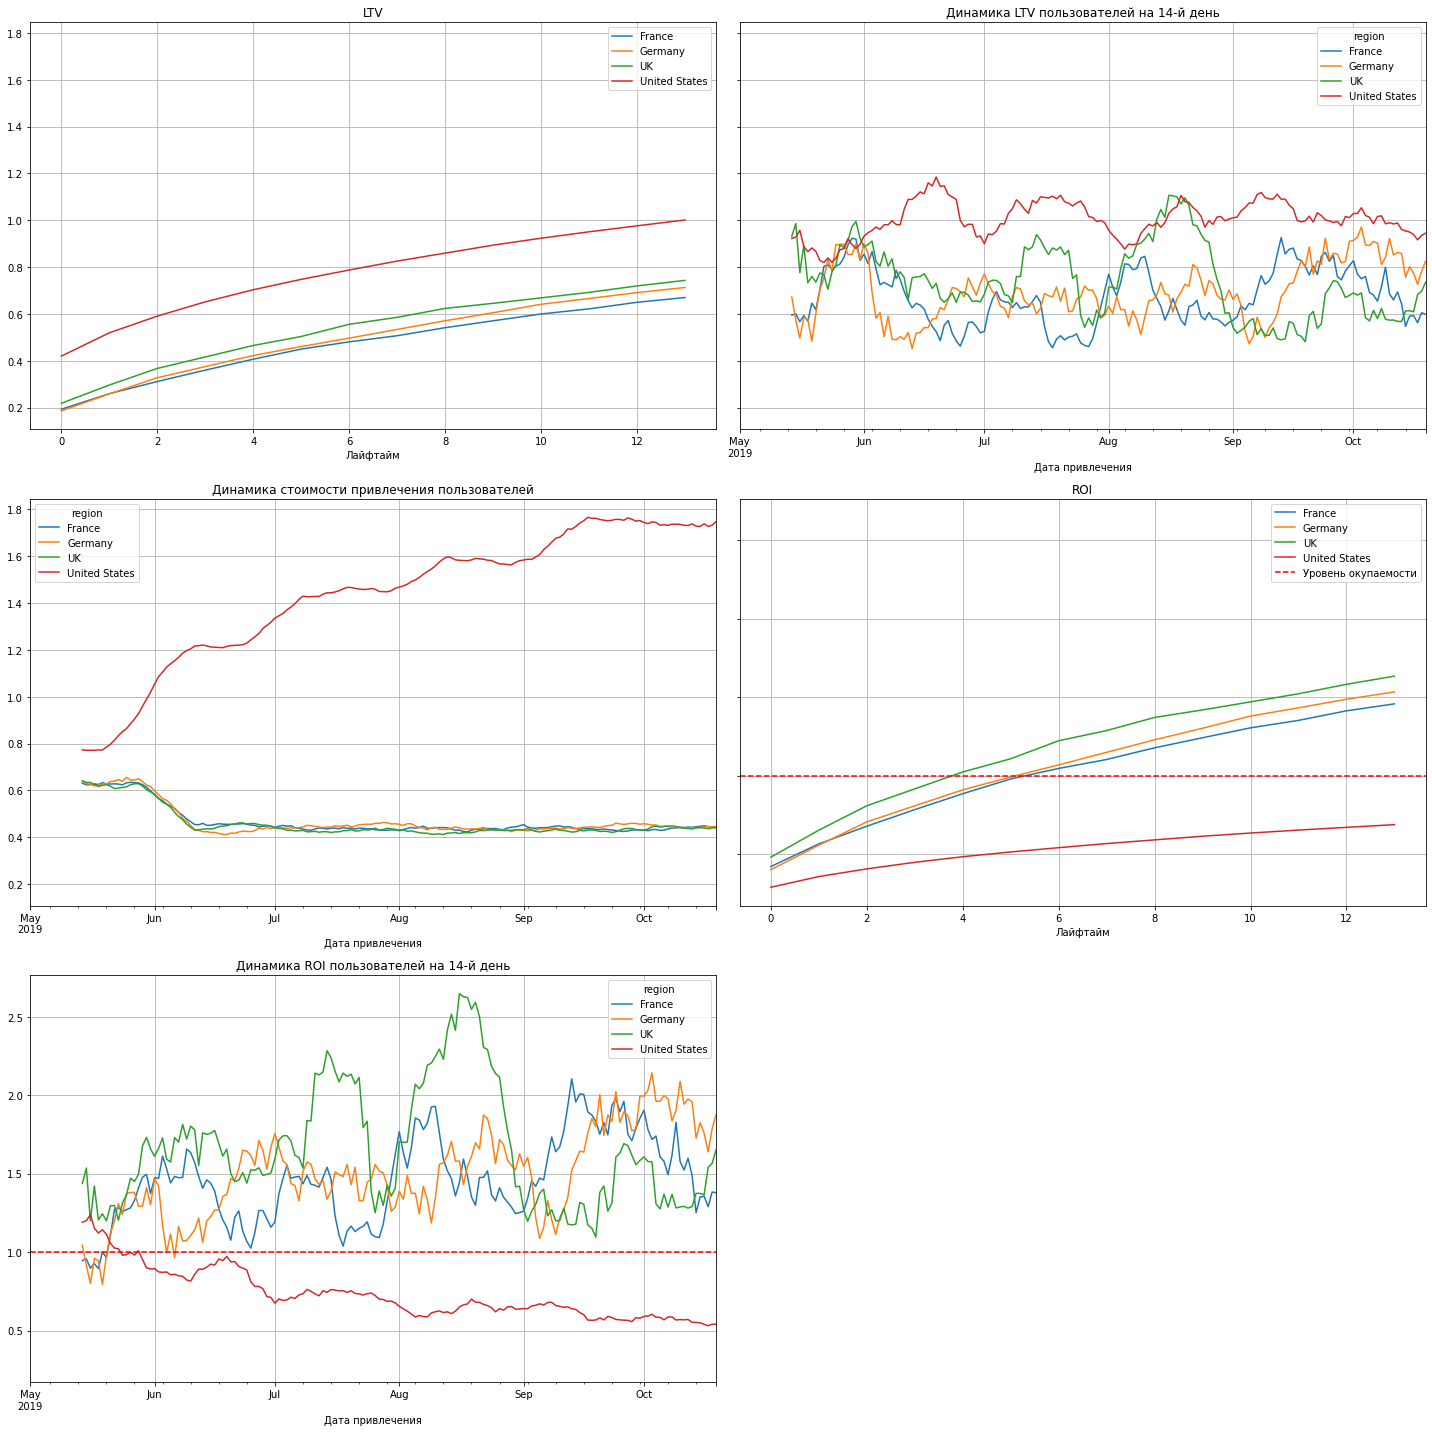

In [40]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)


- здесь мы видим сильную разницу в качестве привлечения пользователей из разных стран. США гораздо сильнее реагирует на рекламу, но и стоимость привлечения непропорционально большая. Все остальные довольно стабильны относительно друг друга.

- несмотря на огромное количество привлеченных пользователей из США, толку от них для приложения нет, они быстро приходят и так же быстро уходят,

- затраты на рекламу в Европе остаются неизменными и окупаются, а вот в США растут и перестали окупаться с июня (видимо, благодаря вливаниям рекламных денег в TipTop).

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Корректно, при высоком САС мы видим низкую окупаемость у США, а другие страны в то же время окупаются. Как уже было отмечено выше по проекту по устройствам, еще было бы интересно, какая у нас разбивка в привязках страна-устройство-канал, то есть чтобы определить проблему США более точечно нам это было бы полезно знать)</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Но опиши здесь пожалуйста и графики LTV 

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Ценность у США была заметно выше других стран

#### Окупаемость рекламы с разбивкой по рекламным каналам

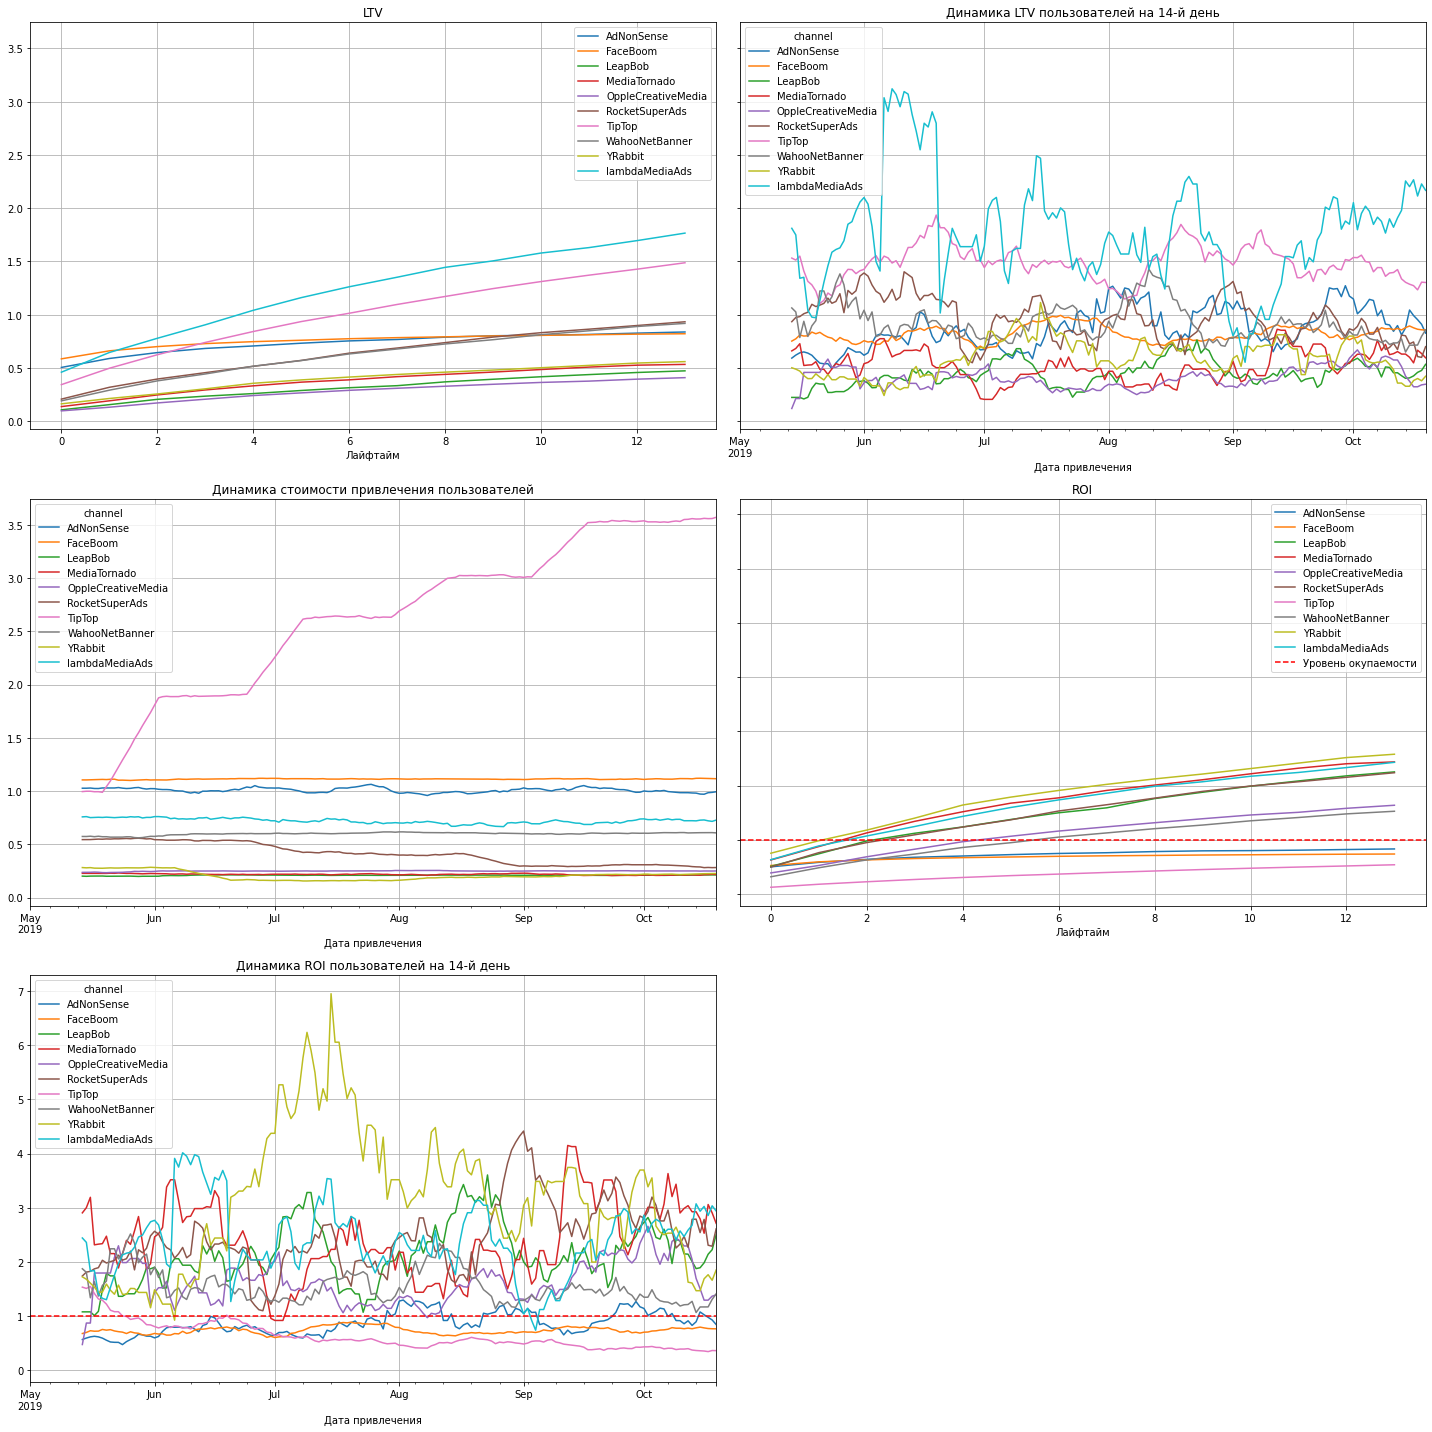

In [41]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

,cac
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01


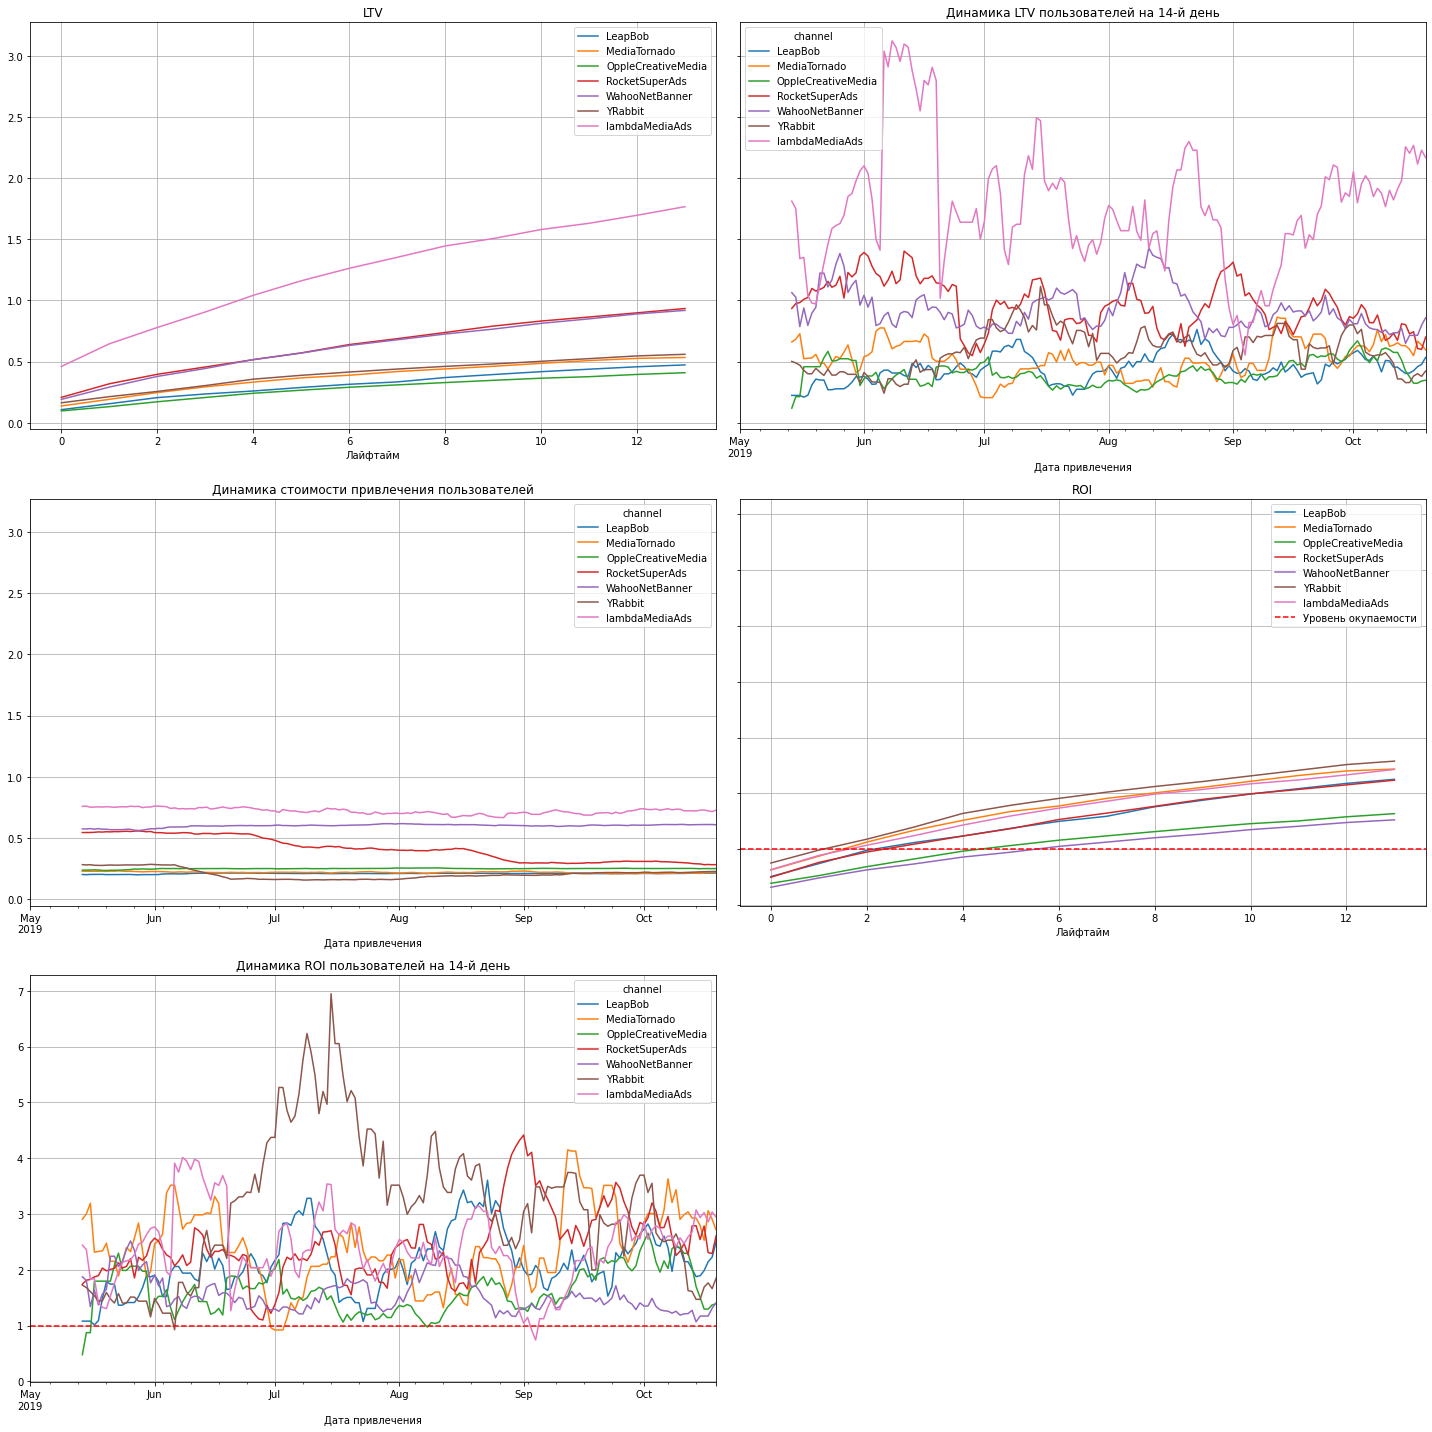

In [57]:
# считаем LTV и ROI без учета топ 4 CAC по каналам для более внятной картины
display(cac_channel.head(3))

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != ["TipTop", "FaceBoom",  "AdNonSense"]'), orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

In [59]:
#делаем группировку по странам
(
     profiles
     .pivot_table(index='channel',
                  columns='region',
                  aggfunc={'user_id': 'count'}
                 )
     .sort_values(by=('user_id', 'United States'), 
                  ascending=False)
 ).div(
     profiles
     .pivot_table(columns='region',
                  aggfunc={'user_id': 'count'}
                 )
     .values
 ).fillna(0).style.format('{:.2%}')

Каналы привлечения имеют специализацию по странам.

При этом каналы, работающие на европейскую публику одинаково представлены как в во Франции, так и в Великобритании с Германией.Этот факт можно и нужно учесть, при выборе замены, если это потребуется.

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Супер! Это очень полезное и верное дополнение

По эти графикам мы можем отментить, что:

- На двухнедельном лайфтайме затраты на первую тройку компаний (на которые тратится практически весь рекламный бюджет) - не окупаются,
- Затраты на рекламу в TipTop и FaceBoom вообще не окупаются,
- С затратами на рекламу TipTop увеличиваются каждый месяц,
- Динамика стоимости привлечения пользователей наиболее высокая у канала TipTop. Но такие расходы не привели к окупаемости. У остальных динамика стабильная. Из 10 каналов только 3 находятся ниже уровня окупаемости, включая TipTop.
- У окупаемых каналов отмечается медленный, но стабильный рост клиентуры.
- Разные каналы имеют разную сферу влияния по регионам.
- Перспективным каналом кажется lambdaMediaAds - низкая стоимость привлечения и высокие показатели пожизненнаой ценности клиента.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Верно, у нас не окупилось три канала привлечения и у TipTop постоянно растут цены привлечения, в то же время lambdaMediaAds на первом месте по LTV</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Но ведь здесь еще важно описать и те каналы, которые смогли достичь положительной окупаемости, поскольку дальше нам нужно будет дать рекомендации менеджерам

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Так менеджеру будет гораздо понятнее, с чем ему работать

Итак, в результате анализа окупаемости рекламы можно сделать следующие выводы:

- в общем и целом реклама не окупается;
- это вызвано низкой окупаемостью рекламы в США, как основной страны присутствия;
- пользователи из США конверсируются больше, но есть проблемы с удержанием платящих пользователей;
- один из самых проблемных каналов - FaceBoom (не окупается имея второе место по сумме затрат на рекламу, низкое удержание платящих пользователей); далее хотим отметить TipTop - неоправданно высокий рост САС, в следствие чего он через месяц перестал окупаться;
- по устройствам в аутсайдерах конверсии пользователи ПК, но при этом они неплохо удерживаются.
- Пользователи ПК - наиболее непопулярные пользователи проекта (зато самые живучие).


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> По пунктам хорошо указал на все проблемы кампании в разрезе сегментов и показателей</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Еще исходя из общих проблем Штатов было бы интересно посмотреть например на бизнес-показатели (графики) в разрезе США-Европа или еще как вариант попробовать посмотреть на общие показатели без лидеров по САС в кампании

### Выводы и рекомендации

Компания-заказчик представлена на рынке Европы (Германия, Франция и Великобритания) и в США. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

Мы проанализировали данные, предоставленные компанией-заказчиком (информация о пользователях, привлечённых с 1 мая по 27 октября 2019 года):

- лог сервера с данными об их посещениях,
- выгрузку покупок за этот период,
- рекламные расходы.

В результате исследования было выявлено, что основной причиной финансовых проблем являются рекламные траты на привлечение пользователей посредством FaceBoom, TipTop в США и AdNonSence в Европе (топ3 САС):

- высокая стоимость привлечения у этих каналов, с горизонтом событий в две недели она не окупается;

- при этом, платящие пользователи FaceBoom и AdNonSence очень плохо удерживаются;

- расходы на привлечение в TipTop за полгода выросли почти в три раза.

В качестве рекомендаций предлагаем следующие направления:

1. с учетом того, что подавляющее количество пользователей из США, необходиом проработать отношения с рекламными площадками этого направления:
- как вариант, отказаться от FaceBoom и перенаправить рекламные средства в пользу других каналов;

- выявить причину роста САС канала TipTop и по возможности устранить ее. Если это невозможно, то отказаться от этой рекламной площадки в пользу других;

- достаточно перспективным выглядит RocketSuperAds (низкий САС, неплохое привлечение и удержание, конверсия на уровне), но как мы видели с TipTop, ставить всё на "красное" не всегда хорошая идея. Во избежание рисков следует распределить бюджет по RocketSuperAds, MediaTornado и YRabbit ввиду их стабильных показателей. Возможен небольшой фаворитизм в сторону RocketSuperAds.

2. обратить внимание на европейский рынок, тут перспективным выглядит lambdaMediaAds, но так же как и США - лучше ставить на несколько лошадок - lambdaMediaAds, LeapBob, OppleCreativeMedia и WahooNetBanner. Возможно чуть больше в lambdaMediaAds. Снизить расходы в AdNonSens.

3. поработать с органическими пользователями: это существенная доля дохода приложения и залог его будущей стабильности. Здесь я бы в первую очередь посоветовал вложиться в SEO (Search Engine Optimization), так как существенный рост органики приходит, если поисковик выдает ваш вариант в первых трёх строках. В остальном - повышение качества сервиса самого приложения, а именно обратной связи с клиентами.

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Но рекомендации и выводы менеджерам стоит дополнить и доработать:
    
* "*В результате исследования было выявлено, что основной причиной финансовых проблем являются рекламные траты на привлечение пользователей посредством FaceBoom, TipTop в США и AdNonSence в Европе (топ3 САС):*" - на самом деле мы сейчас не знаем, как эти каналы были распределены по странам и нам это нужно проверить, ведь нигде группирвоку в проекте мы пока что не выполняли. Соответственно и рекомендации с привязкой к странам пока что мы дать на самом деле не можем;   
    
* "*достаточно перспективным выглядит RocketSuperAds (низкий САС, неплохое привлечение и удержание, конверсия на уровне);*" - согласен с таким предложением, но как мы видели в анализе монополизация одного канала (TipTop) может быть очень рискованной, тут стоит указать бОльшее количество каналов, для распределения рисков. Ананлогично и для AdNonSense, нам нужно указать бОльшее количество каналов;
    
* "*оработать с органическими пользователями: это существенная доля дохода приложения.*" - хорошая рекомендация, но уточни пожалуйста, что именно мы можем сделать с органикой?

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил. Добавил группировку по странам. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Совершенно верно, группировка добавлены и каждый пункт тоже доработан

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Рекомендации:
    
По сути своей весь анализ в этом спринте в той или иной мере основан на когортном анализе, прикреплю полезные ссылки на него. Но на самом деле очень советую в целом полистать gopractice, там очень хорошо описаны все бизнесовые и продуктовые метрики, этот курс часто приводят в пример для продуктовых аналитиков.

https://blog.ohmystats.com/cohort-analysis/
    
https://gopractice.ru/cohort_analysis/
    
https://smysl.io/blog/pandas-cohorts/</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Георгий, проект отличный! У тебя очень сильные аналитические навыки, владение инструментами для проведения исследования и навыки продуктовой аналитики. Но всё же у меня есть несколько замечаний и я попрошу тебя исправить их, чтобы проект стал еще лучше! </div>